In [5]:
!pip install pandas_datareader

In [10]:
!pip install tensorflow


In [13]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install pandas-datareader


In [21]:
pip install alpha_vantage


Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
from datetime import datetime, timedelta
import pandas as pd

In [9]:
from alpha_vantage.timeseries import TimeSeries
import datetime as dt

# Set the stock ticker symbol and the date range
ticker = "SBUX"
start_date = "2023-04-05"
end_date = "2022-11-10"

# Instantiate TimeSeries object with your API key
ts = TimeSeries(key='7FTBB893KHGM9TNT', output_format='pandas')

# Retrieve stock data
stock_data, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')

# Filter the data to select the date range
start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
stock_data = stock_data.loc[start_date:end_date]

print(stock_data)

            1. open  2. high   3. low  4. close  5. adjusted close  \
date                                                                 
2023-04-05   103.98   105.70  103.930    104.90         104.900000   
2023-04-04   104.85   105.01  103.350    104.00         104.000000   
2023-04-03   104.06   104.94  103.665    104.85         104.850000   
2023-03-31   101.84   104.28  101.840    104.13         104.130000   
2023-03-30   101.44   101.70  100.650    101.32         101.320000   
...             ...      ...      ...       ...                ...   
2022-11-16    96.52    97.96   96.260     97.07          96.587291   
2022-11-15    98.91    99.53   97.290     97.83          97.343512   
2022-11-14    97.13    98.56   96.685     97.42          96.935551   
2022-11-11    96.76    98.67   96.570     97.38          96.895750   
2022-11-10    93.89    96.42   93.330     96.26          95.781319   

             6. volume  7. dividend amount  8. split coefficient  
date                  

In [11]:
# Date is an index but to be sure , let's sort
stock_data = stock_data.sort_index(ascending=True)
stock_data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-11-10,93.89,96.42,93.330,96.26,95.781319,10408390.0,0.0,1.0
2022-11-11,96.76,98.67,96.570,97.38,96.895750,8294396.0,0.0,1.0
2022-11-14,97.13,98.56,96.685,97.42,96.935551,8521098.0,0.0,1.0
2022-11-15,98.91,99.53,97.290,97.83,97.343512,6409950.0,0.0,1.0
2022-11-16,96.52,97.96,96.260,97.07,96.587291,5348881.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2023-03-30,101.44,101.70,100.650,101.32,101.320000,4082616.0,0.0,1.0
2023-03-31,101.84,104.28,101.840,104.13,104.130000,6900065.0,0.0,1.0
2023-04-03,104.06,104.94,103.665,104.85,104.850000,3855350.0,0.0,1.0


In [12]:
# Get shape
stock_data.shape

(100, 8)

In [20]:
import os
if not os.path.exists('Images'):
    os.makedirs('Images')

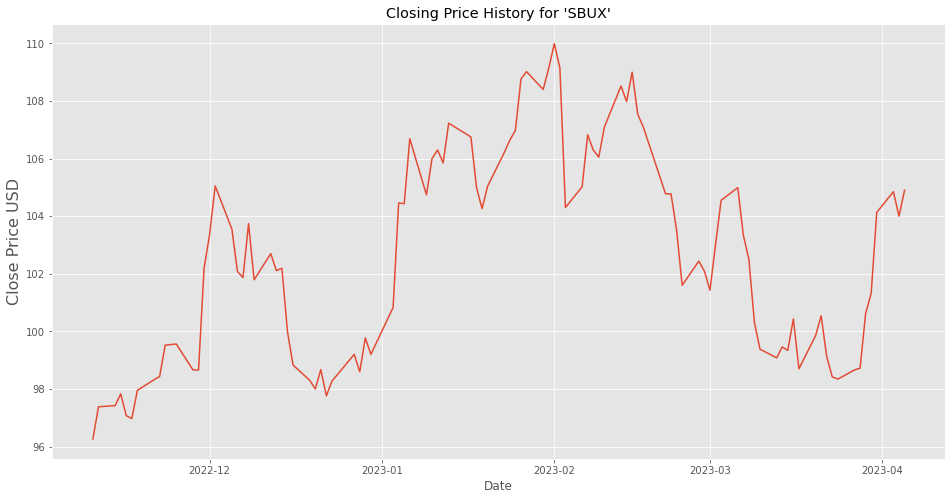

In [21]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title(f"Closing Price History for '{ticker}'")
plt.plot(stock_data['4. close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('Images/his_'+ticker+'.png')
plt.show()


In [27]:
print(stock_data.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')


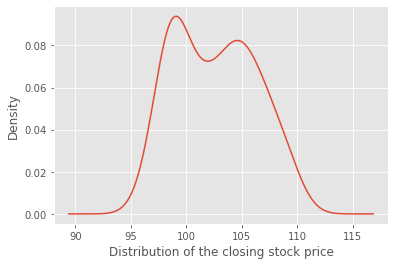

In [29]:
stock_data['4. close'].plot.density()
plt.xlabel('Distribution of the closing stock price')
plt.savefig('Images/den_'+ticker+'.png')
plt.show()


In [30]:
# DF with only close
TSdata_df = stock_data.filter(['4. close'])
TSdata_df


,4. close
date,
2022-11-10,96.26
2022-11-11,97.38
2022-11-14,97.42
2022-11-15,97.83
2022-11-16,97.07
...,...
2023-03-30,101.32
2023-03-31,104.13
2023-04-03,104.85


In [31]:
TSdata_arr = TSdata_df.values # this creates an array of Close Price
TSdata_arr

array([[ 96.26 ],
       [ 97.38 ],
       [ 97.42 ],
       [ 97.83 ],
       [ 97.07 ],
       [ 96.97 ],
       [ 97.95 ],
       [ 98.32 ],
       [ 98.43 ],
       [ 99.52 ],
       [ 99.56 ],
       [ 98.66 ],
       [ 98.66 ],
       [102.2  ],
       [103.37 ],
       [105.05 ],
       [103.55 ],
       [102.08 ],
       [101.87 ],
       [103.74 ],
       [101.79 ],
       [102.7  ],
       [102.11 ],
       [102.19 ],
       [ 99.99 ],
       [ 98.83 ],
       [ 98.3  ],
       [ 98.   ],
       [ 98.67 ],
       [ 97.76 ],
       [ 98.27 ],
       [ 99.2  ],
       [ 98.6  ],
       [ 99.77 ],
       [ 99.2  ],
       [100.83 ],
       [104.46 ],
       [104.43 ],
       [106.69 ],
       [104.74 ],
       [106.   ],
       [106.3  ],
       [105.85 ],
       [107.23 ],
       [106.75 ],
       [105.   ],
       [104.26 ],
       [105.04 ],
       [106.21 ],
       [106.64 ],
       [106.98 ],
       [108.76 ],
       [109.02 ],
       [108.4  ],
       [109.14 ],
       [10

In [32]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# ADF Test
result = adfuller(TSdata_arr, autolag='AIC')

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -2.190770
p-value: 0.209612
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
Failed to Reject Ho - Time Series is Non-Stationary


In [42]:
df2 = TSdata_df['4. close'].diff().dropna().to_frame()
df2

,4. close
date,
2022-11-11,1.12
2022-11-14,0.04
2022-11-15,0.41
2022-11-16,-0.76
2022-11-17,-0.10
...,...
2023-03-30,0.70
2023-03-31,2.81
2023-04-03,0.72


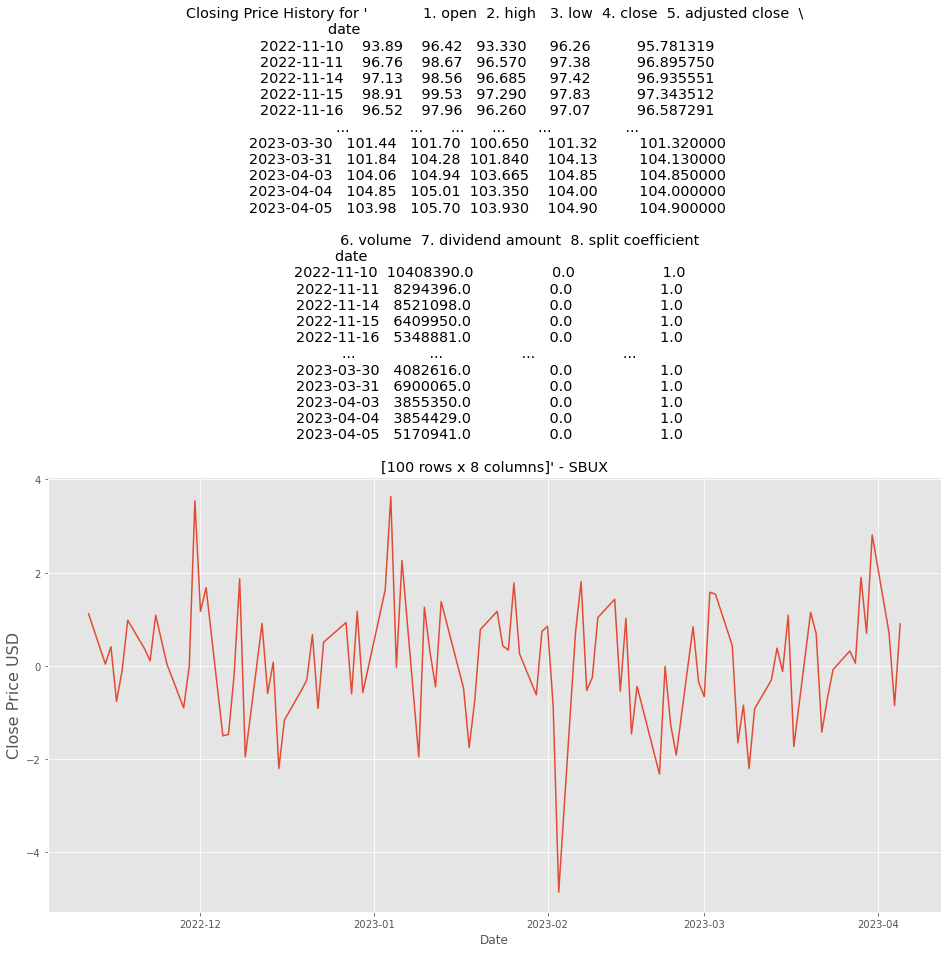

In [44]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock_data}' - {ticker}")
plt.plot(df2['4. close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('Images/diff_'+ticker+'.png')
plt.show()

In [45]:
TSdata_arr = df2.filter(['4. close']).values
TSdata_arr

array([[ 1.12 ],
       [ 0.04 ],
       [ 0.41 ],
       [-0.76 ],
       [-0.1  ],
       [ 0.98 ],
       [ 0.37 ],
       [ 0.11 ],
       [ 1.09 ],
       [ 0.04 ],
       [-0.9  ],
       [ 0.   ],
       [ 3.54 ],
       [ 1.17 ],
       [ 1.68 ],
       [-1.5  ],
       [-1.47 ],
       [-0.21 ],
       [ 1.87 ],
       [-1.95 ],
       [ 0.91 ],
       [-0.59 ],
       [ 0.08 ],
       [-2.2  ],
       [-1.16 ],
       [-0.53 ],
       [-0.3  ],
       [ 0.67 ],
       [-0.91 ],
       [ 0.51 ],
       [ 0.93 ],
       [-0.6  ],
       [ 1.17 ],
       [-0.57 ],
       [ 1.63 ],
       [ 3.63 ],
       [-0.03 ],
       [ 2.26 ],
       [-1.95 ],
       [ 1.26 ],
       [ 0.3  ],
       [-0.45 ],
       [ 1.38 ],
       [-0.48 ],
       [-1.75 ],
       [-0.74 ],
       [ 0.78 ],
       [ 1.17 ],
       [ 0.43 ],
       [ 0.34 ],
       [ 1.78 ],
       [ 0.26 ],
       [-0.62 ],
       [ 0.74 ],
       [ 0.85 ],
       [-0.84 ],
       [-4.85 ],
       [ 0.72 ],
       [ 1.805

In [46]:
# Scale the Data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(TSdata_arr)
# scaled_data

In [47]:
training_data_len = math.ceil(len(TSdata_arr) * 0.75)
training_data_len

75

In [48]:
# Created scaled training dataset
train_data = scaled_data[0:training_data_len]
train_data.shape

(75, 1)

In [51]:
ts_points = 10


In [53]:
# Split
X_train = []
y_train = []

for i in range(ts_points, len(train_data)):
    X_train.append(train_data[i-ts_points:i,0])
    y_train.append(train_data[i,0])
    if i <= ts_points+3:
        print(X_train)
        print(y_train)
        print()


[array([0.70400943, 0.57665094, 0.62028302, 0.48231132, 0.56014151,
       0.6875    , 0.61556604, 0.58490566, 0.7004717 , 0.57665094])]
[0.465801886792453]

[array([0.70400943, 0.57665094, 0.62028302, 0.48231132, 0.56014151,
       0.6875    , 0.61556604, 0.58490566, 0.7004717 , 0.57665094]), array([0.57665094, 0.62028302, 0.48231132, 0.56014151, 0.6875    ,
       0.61556604, 0.58490566, 0.7004717 , 0.57665094, 0.46580189])]
[0.465801886792453, 0.5719339622641517]

[array([0.70400943, 0.57665094, 0.62028302, 0.48231132, 0.56014151,
       0.6875    , 0.61556604, 0.58490566, 0.7004717 , 0.57665094]), array([0.57665094, 0.62028302, 0.48231132, 0.56014151, 0.6875    ,
       0.61556604, 0.58490566, 0.7004717 , 0.57665094, 0.46580189]), array([0.62028302, 0.48231132, 0.56014151, 0.6875    , 0.61556604,
       0.58490566, 0.7004717 , 0.57665094, 0.46580189, 0.57193396])]
[0.465801886792453, 0.5719339622641517, 0.9893867924528315]

[array([0.70400943, 0.57665094, 0.62028302, 0.48231132, 0.

In [54]:
# convert X_train and y_train to numpy arrays for LSTM
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
print (X_train.shape)
print (y_train.shape)

(65, 10)
(65,)


In [56]:
# LSTM network expects a 3D input (No_of_Samples, number of time steps, and number of features) no_of_features = 1 (Close)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(65, 10, 1)

In [57]:
training_data_len - ts_points

65

In [60]:
hidden_nodes = int(2/3 * (X_train.shape[1] * 1))
print(f"The number of hidden nodes is {hidden_nodes}.")

The number of hidden nodes is 6.


In [61]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size=64

os.makedirs("chk_points/", exist_ok=True)
chkpoint_path="chk_points/weights.{epoch}.hdf5"

# Create chk points
chkpt_callback = ModelCheckpoint(filepath=chkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch")

# chkpoint_path = "chk_points/cp-{epoch:04d}.ckpt"
# chkpt_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=chkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=5*batch_size)                    

# model.save_weights(chkpoint_path.format(epoch=0))    


In [68]:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_split=0.43, callbacks=[chkpt_callback])
model.fit(X_train, y_train, batch_size=64 ,epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 11ms/step - loss: 0.4199
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2747
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1639
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0844
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0330
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0839
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0841
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 0.0491
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0340
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0387
Epoch 13/100
2/2 [==============================] - 0s 7m

In [70]:
model.save('../assets/Model_'+ticker+'.h5')

In [71]:
# test_data = scaled_data[training_data_len:]

# Bring in the last 'ts_points' (120 values) from training set so when X_test is used to predict , predictions have same shape as Y_test
# The for loop starts with 'ts_points' that means the resultant array will have 120 less rows
test_data = scaled_data[training_data_len-ts_points:]



In [72]:
X_test = []
y_test = TSdata_arr[training_data_len:]
for i in range(ts_points, len(test_data)):
    X_test.append(test_data[i-ts_points:i,0])


In [73]:
# convert the data to a numpy array to use it in LSTM MODEL
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], 1))

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
# Models predicted price for X_train
predictions_tr = model.predict(X_train)
predictions_tr = scaler.inverse_transform(predictions_tr)

y_train_tr =  scaler.inverse_transform(y_train.reshape(-1,1))
rmse_tr = math.sqrt(mean_squared_error(y_train_tr, predictions_tr))
rmse_tr

3/3 [==============================] - 1s 3ms/step


1.4468978944193394

In [76]:
# Models predicted price for X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 21ms/step


In [77]:
y_test.shape, predictions.shape

((24, 1), (24, 1))

In [83]:
# RMSE to check accuracy

rmse = math.sqrt(mean_squared_error(y_test, predictions))
rmse

1.2294839824457804

In [85]:
# Plot
train = TSdata_df[:training_data_len]
actual = TSdata_df[training_data_len:]
actual = actual.iloc[:-1]
actual['Predictions'] = predictions
actual

,4. close,Predictions
date,,
2023-03-02,103.01,-0.366176
2023-03-03,104.55,-0.251376
2023-03-06,104.99,-0.174017
2023-03-07,103.34,-0.098140
2023-03-08,102.50,-0.113145
2023-03-09,100.30,-0.137840
2023-03-10,99.38,-0.151835
2023-03-13,99.08,-0.230168
2023-03-14,99.46,-0.244416


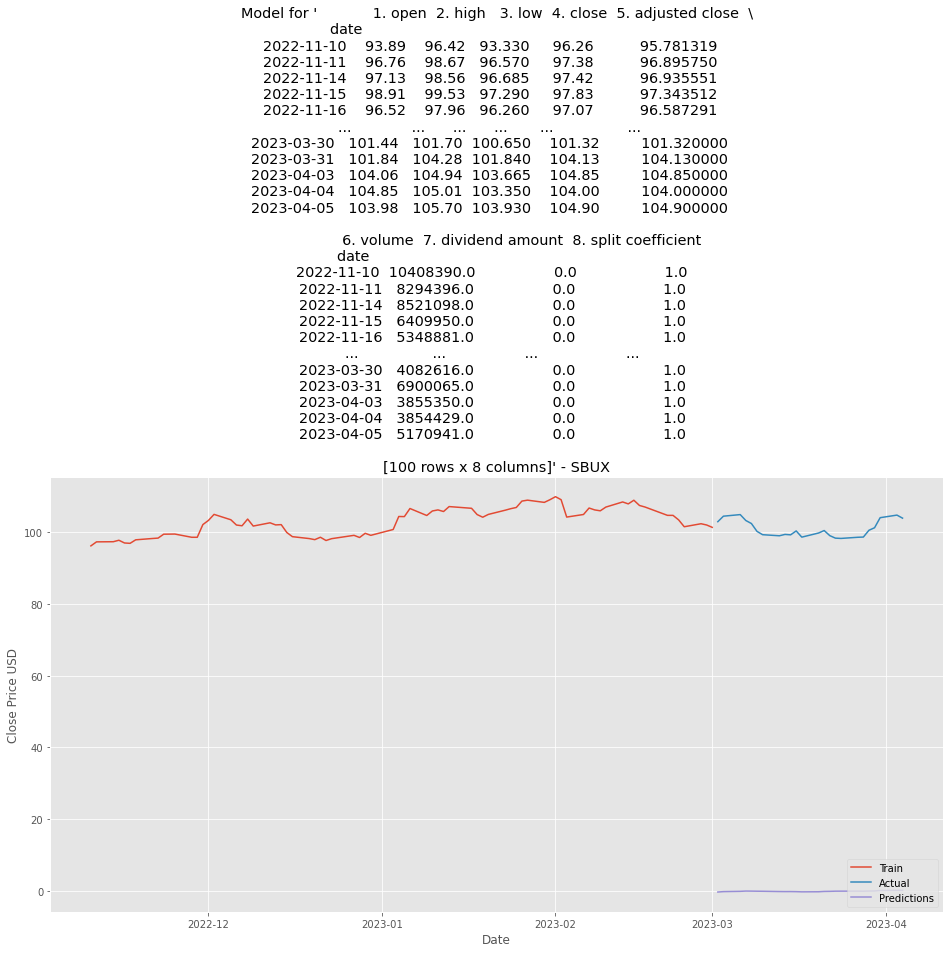

In [89]:
plt.figure(figsize=(16,8))
plt.title(f"Model for '{stock_data}' - {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(train['4. close'])
plt.plot(actual[['4. close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.savefig('Images/'+ticker+'.png')
plt.show()

# TEST

In [92]:
# for predictions add 100 extra days to make sure it has more than ts_points to make up for missing days (weekends and holidays)

fetch_days = ts_points + 100    

sd =  start_date - timedelta(days=fetch_days)
sd = sd.strftime('%Y-%m-%d')

ed = start_date.strftime('%Y-%m-%d')
ed

next_day = (start_date + timedelta(days=1) ).strftime('%Y-%m-%d')
# next_day

In [93]:
# get the quote
quote = pdr.DataReader(ticker, data_source="yahoo", start=sd, end=ed)
new_df = quote.filter(['Close'])
last_n_days = ts_points
last_n_days_arr = new_df[-last_n_days:].values 

TypeError: string indices must be integers

In [ ]:
last_n_days_scaled = scaler.transform(last_n_days_arr)
X_test = []
X_test.append(last_n_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [96]:
##########################loading saved model ###############################
new_model = tf.keras.models.load_model('../assets/Model_'+ticker+'.h5')

# Check its architecture
new_model.summary()
nmpred_price = new_model.predict(X_test)
nmpred_price = scaler.inverse_transform(nmpred_price)
nmpred_price = nmpred_price[0][0]
print(f"Predicted Closing price for '{stock_data}' on {next_day} is {nmpred_price:.4f}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 571ms/st

In [98]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0][0]
print(f"Predicted Closing price for '{stock_data}' on {next_day} is {pred_price:.4f}")

1/1 [==============================] - 0s 21ms/step
Predicted Closing price for '            1. open  2. high   3. low  4. close  5. adjusted close  \
date                                                                 
2022-11-10    93.89    96.42   93.330     96.26          95.781319   
2022-11-11    96.76    98.67   96.570     97.38          96.895750   
2022-11-14    97.13    98.56   96.685     97.42          96.935551   
2022-11-15    98.91    99.53   97.290     97.83          97.343512   
2022-11-16    96.52    97.96   96.260     97.07          96.587291   
...             ...      ...      ...       ...                ...   
2023-03-30   101.44   101.70  100.650    101.32         101.320000   
2023-03-31   101.84   104.28  101.840    104.13         104.130000   
2023-04-03   104.06   104.94  103.665    104.85         104.850000   
2023-04-04   104.85   105.01  103.350    104.00         104.000000   
2023-04-05   103.98   105.70  103.930    104.90         104.900000   

        